<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
             bill_average  total_bill
day  sex                             
Thur Male       18.714667      561.44
     Female     16.715312      534.89
Fri  Male       19.857000      198.57
     Female     14.145556      127.31
Sat  Male       20.802542     1227.35
     Female     19.680357      551.05
Sun  Male       21.887241     1269.46
     Female     19.872222      357.70
          tip_pct
smoker           
Yes     16.319604
No      15.932846
day

/tmp/ipython-input-1805957714.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = (df.groupby(["day","sex"])
/tmp/ipython-input-1805957714.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_smoker_avg = df.groupby("smoker").agg({"tip_pct" : "mean"})
/tmp/ipython-input-1805957714.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest_avg_tip_day = df.groupby("day")["tip"].mean().sort_values(ascending=

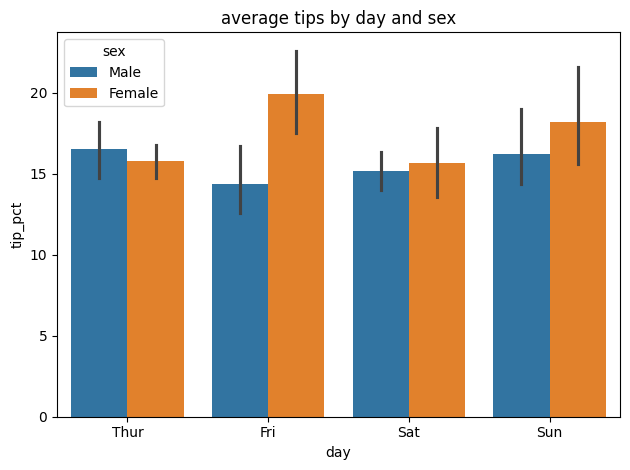

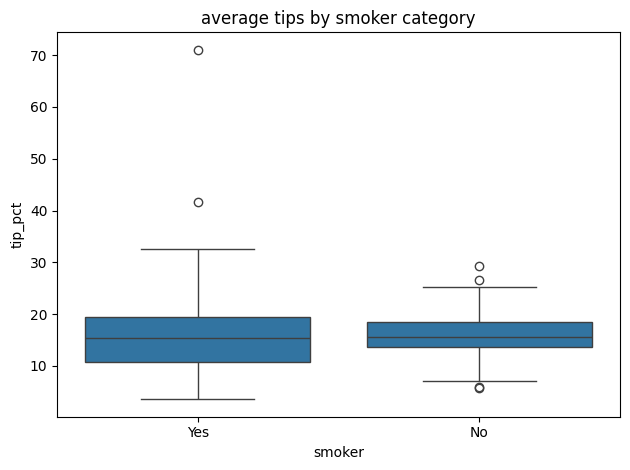

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

df = tips.copy()

tips.info()
tips.head()

df = df.dropna()
df["tip_pct"] = df["tip"] / df["total_bill"] * 100
df.head()

df_avg = (df.groupby(["day","sex"])
          .agg(
              bill_average = ("total_bill","mean"),
              total_bill = ("total_bill","sum")

          ))
print(df_avg)

df_smoker_avg = df.groupby("smoker").agg({"tip_pct" : "mean"})
print(df_smoker_avg)

highest_avg_tip_day = df.groupby("day")["tip"].mean().sort_values(ascending=False)
print(highest_avg_tip_day)

df["is_big_table"] = np.select(
    [df["size"] >= 4],
    ["Yes"],
    default="No"
)

print(df.head())

is_big_table_avg = df.groupby("is_big_table").agg({"tip_pct" : "mean"})
print(is_big_table_avg)

df["weekend"] = np.select(
    [df["day"].isin(["Sat","Sun"])],
    ["Weekend"],
    default="Weekday"
)
weekend_vs_weekday_avg = df.groupby("weekend").agg({"tip_pct" : "mean"})
print(weekend_vs_weekday_avg)

sns.barplot(data=df,x="day",y="tip_pct",hue="sex")
plt.title("average tips by day and sex")
plt.tight_layout()
plt.show()

sns.boxplot(data=df,x="smoker",y="tip_pct")
plt.title("average tips by smoker category")
plt.tight_layout()
plt.show()


